# Table of Contents

1. Introduction
2. Preliminary Tasks
3. Data Cleaning
4. Exploratory Data Analysis
5. Hypothesis Testing
6. Modelling
7. Summary/Conclusion
8. References


# Introduction

# Goal of the Report

The goal of this report is to develop hardware and/or software which can determine the amount (using start/end times and heart rates) and type of physical activity carried out by an individual, and to also determine the  actionable insights that are derivable from the dataset.

The dataset used for this assignment is Physical Activity Monitoring dataset "PAMAP2", an activity monitoring dataset that contains 18 different physical activities that were performed by 9 different subjects — eight men and one woman wearing 3 inertial measurement units and a heart rate monitor. The data is stored in individual text files per subject. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data).


# Specific Requirements for Report

1. Carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
2. Develop and test at least one hypothesis for a relationship between a single pair of attributes;
3. Develop and test at least one model which uses multiple attributes to make predictions.

The first step i will be taking is to import the neccessary libraries and functions needed for all of my code to run properly.

# Preliminary Tasks

In [1]:
#importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import StratifiedKFold
import seaborn as sn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from IPython.display import display
sn.set()

In the cell below, i will be loading the dataset.

In [2]:
# Loading the dataset
list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activity_id = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activity_id","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)

54

In [3]:
columns

['timestamp',
 'activity_id',
 'heartrate',
 'handTemperature',
 'handAcc16_1',
 'handAcc16_2',
 'handAcc16_3',
 'handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'handGyro1',
 'handGyro2',
 'handGyro3',
 'handMagne1',
 'handMagne2',
 'handMagne3',
 'handOrientation1',
 'handOrientation2',
 'handOrientation3',
 'handOrientation4',
 'chestTemperature',
 'chestAcc16_1',
 'chestAcc16_2',
 'chestAcc16_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestGyro1',
 'chestGyro2',
 'chestGyro3',
 'chestMagne1',
 'chestMagne2',
 'chestMagne3',
 'chestOrientation1',
 'chestOrientation2',
 'chestOrientation3',
 'chestOrientation4',
 'ankleTemperature',
 'ankleAcc16_1',
 'ankleAcc16_2',
 'ankleAcc16_3',
 'ankleAcc6_1',
 'ankleAcc6_2',
 'ankleAcc6_3',
 'ankleGyro1',
 'ankleGyro2',
 'ankleGyro3',
 'ankleMagne1',
 'ankleMagne2',
 'ankleMagne3',
 'ankleOrientation1',
 'ankleOrientation2',
 'ankleOrientation3',
 'ankleOrientation4']

In [4]:
#Loading all the seperate files into a single dataframe
df_raw = pd.DataFrame() 
for i in list_of_files : 
  int_data = pd.read_table(i , names = columns, sep = '\s+')
  int_data['SubjectID'] = int(i[-5])
  df_raw = df_raw.append(int_data, ignore_index = True)

/var/folders/43/4rz2qdq10nn_s7lrzvhpc8gc0000gp/T/ipykernel_29280/2837029192.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, ignore_index = True)
/var/folders/43/4rz2qdq10nn_s7lrzvhpc8gc0000gp/T/ipykernel_29280/2837029192.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, ignore_index = True)
/var/folders/43/4rz2qdq10nn_s7lrzvhpc8gc0000gp/T/ipykernel_29280/2837029192.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(int_data, ignore_index = True)
/var/folders/43/4rz2qdq10nn_s7lrzvhpc8gc0000gp/T/ipykernel_29280/2837029192.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

In [5]:
pd.set_option('display.max_columns',None)
df_raw

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.000000,0.000000,0.000000,0.000000,31.8125,0.238080,9.80003,-1.688960,0.265304,9.81549,-1.413440,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.000000,0.000000,0.000000,0.000000,30.3125,9.65918,-1.655690,-0.099797,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499844,32.3750,2.926640,10.21030,-0.983335,3.125630,10.62120,0.642058,-0.034671,-0.222172,-0.191336,15.599100,-40.9116,14.9966,0.625172,-0.760781,-0.039443,-0.169753,31.5000,9.38737,-0.565040,-3.273700,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,1.475210,-0.028917,0.806540,20.7931,-34.9954,-34.17720,0.555545,-0.596490,0.299264,0.495995,32.3750,2.722810,9.37125,-2

As observed from the table above, the dataframe requires cleaning. We move on to cleaning the data in next section.

# Data Cleaning

For the data cleaning, I will be dropping data from the accelerometer under the scale of 6, because due to high impacts caused by certain movements saturation could occur with a scale 6 acceleration. Also I am dropping the orientation data as it is not useful to predict the activities.
Also, from observing the "PerformedActivitiesSummary" file it is noticed that some data is missing which has to be accounted for and there are also some activities with NaN values for various subjects and i will be using "interpolation" to fill the data. 

In [6]:
drop_columns = ['handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4', 'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

In [7]:
df_raw1 = df_raw.drop(drop_columns, axis = 1)

In [8]:
#check for null values
df_raw1.isnull().sum()

timestamp                 0
activity_id               0
heartrate           2610265
handTemperature       13141
handAcc16_1           13141
handAcc16_2           13141
handAcc16_3           13141
handGyro1             13141
handGyro2             13141
handGyro3             13141
handMagne1            13141
handMagne2            13141
handMagne3            13141
chestTemperature       3563
chestAcc16_1           3563
chestAcc16_2           3563
chestAcc16_3           3563
chestGyro1             3563
chestGyro2             3563
chestGyro3             3563
chestMagne1            3563
chestMagne2            3563
chestMagne3            3563
ankleTemperature      11749
ankleAcc16_1          11749
ankleAcc16_2          11749
ankleAcc16_3          11749
ankleGyro1            11749
ankleGyro2            11749
ankleGyro3            11749
ankleMagne1           11749
ankleMagne2           11749
ankleMagne3           11749
SubjectID                 0
dtype: int64

In [9]:
df_raw.head()

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,SubjectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.6806,-69.2128,-5.58905,1.0,0.0,0.0,0.0,31.8125,0.238080,9.80003,-1.68896,0.265304,9.81549,-1.41344,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,1.0,0.0,0.0,0.0,30.3125,9.65918,-1.65569,-0.099797,9.64689,-1.55576,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047759,0.006474,14.8991,-69.2224,-5.82311,1.0,0.0,0.0,0.0,31.8125,0.319530,9.61282,-1.49328,0.234939,9.78539,-1.42846,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.0,0.0,0.0,0.0,30.3125,9.69370,-1.57902,-0.215687,9.61670,-1.61630,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.0,0.0,0.0,0.0,31.8125,0.235593,9.72421,-1.76621,0.173850,9.72528,-1.51894,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.0,0.0,0.0,0.0,30.3125,9.58944,-1.73276,0.092914,9.63173,-1.58605,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.0,0.0,0.0,0.0,31.8125,0.388697,9.53572,-1.72410,0.157969,9.64994,-1.57952,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.0,0.0,0.0,0.0,30.3125,9.58814,-1.77040,0.054545,9.63197,-1.63135,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.0,0.0,0.0,0.0,31.8125,0.315800,9.49908,-1.60914,0.233506,9.57411,-1.44418,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.0,0.0,0.0,0.0,30.3125,9.69771,-1.65625,-0.060809,9.64699,-1.64647,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [10]:
df_raw1 = df_raw1.dropna(subset = ['heartrate'])
df_raw1

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.58905,31.8125,0.238080,9.80003,-1.688960,-0.005065,-0.006781,-0.005663,0.471960,-51.0499,43.2903,30.3125,9.65918,-1.655690,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1
10,8.48,0,104.0,30.0000,2.29745,8.90450,3.46984,-0.015370,-0.065894,-0.026322,15.13100,-68.8051,-5.47408,31.8125,0.237283,9.49881,-1.688000,-0.004998,0.010533,-0.009726,0.216756,-50.1418,42.6747,30.3125,9.77736,-1.582070,0.093906,0.078900,0.002283,0.020352,-61.5302,-38.72400,-58.386000,1
21,8.59,0,104.0,30.0000,2.40867,9.16819,3.35516,0.032015,0.017456,-0.006301,15.68850,-68.4006,-5.59184,31.8125,0.204242,9.68823,-1.534330,0.020125,-0.009126,-0.008258,0.280342,-51.9318,42.6733,30.3125,9.62446,-1.770320,0.016327,0.004046,0.005791,0.021763,-61.0729,-39.50910,-58.645700,1
32,8.70,0,104.0,30.0000,2.18114,8.86676,3.39125,0.073080,0.038494,0.002435,14.45490,-68.7615,-5.81306,31.8125,0.278383,9.76278,-1.610670,0.012105,0.020507,-0.013924,-0.209844,-50.9097,42.6672,30.3750,9.62306,-1.617800,-0.061813,-0.009526,0.010042,-0.004228,-61.4205,-39.04750,-59.256800,1
43,8.81,0,104.0,30.0000,2.40681,8.71326,3.39515,-0.080054,0.025991,-0.019187,14.68560,-69.1072,-5.35651,31.8125,0.239870,9.61228,-1.610880,-0.012182,-0.021782,0.003970,0.280518,-52.0492,43.2860,30.3750,9.73954,-1.657770,0.093988,0.025525,-0.013822,0.008244,-60.8480,-38.87130,-57.402900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872489,99.80,0,161.0,25.1875,-2.36226,10.75660,7.05010,0.771096,2.821600,-0.500235,6.41472,-18.8506,-49.99380,32.3750,1.450120,9.65272,-0.621063,0.320980,0.032811,0.774660,20.678000,-40.5791,11.2230,31.5000,9.53890,-1.060870,-3.114710,0.004010,-0.181098,-0.261212,-45.9456,6.51345,-0.604719,9
2872500,99.91,0,161.0,25.1875,-5.04845,11.03180,5.77734,0.455965,2.275130,0.045379,16.88010,-23.2536,-46.05130,32.3750,3.270390,9.89958,-2.215170,0.282894,0.141435,0.546708,17.161600,-40.8391,13.8791,31.5000,9.65186,-0.719538,-3.154260,0.089532,-0.090799,-0.268806,-45.5317,5.33578,-0.034568,9
2872511,100.02,0,161.0,25.1875,-6.37083,11.64810,5.63999,0.387395,1.711320,0.952960,24.08880,-26.2412,-41.32350,32.3750,2.411800,9.37958,-1.570780,0.067829,0.075997,0.244331,15.616300,-41.4275,14.4357,31.5000,9.54198,-0.681500,-3.078440,-0.093793,-0.039849,-0.012008,-46.5426,4.87121,-0.037586,9
2872522,100.13,0,161.0,25.1875,-4.98611,8.70795,4.78544,0.901751,0.545959,1.242090,22.75650,-31.6272,-36.69500,32.3750,3.370840,9.11458,-1.320210,-0.165396,-0.371275,-0.000035,14.462900,-41.7718,14.4296,31.5000,9.57182,-0.869653,-3.308510,-0.041527,-0.099871,-0.122716,-45.6598,5.21258,-0.318540,9


In [11]:
df_raw1.isnull().sum()

timestamp              0
activity_id            0
heartrate              0
handTemperature     1195
handAcc16_1         1195
handAcc16_2         1195
handAcc16_3         1195
handGyro1           1195
handGyro2           1195
handGyro3           1195
handMagne1          1195
handMagne2          1195
handMagne3          1195
chestTemperature     295
chestAcc16_1         295
chestAcc16_2         295
chestAcc16_3         295
chestGyro1           295
chestGyro2           295
chestGyro3           295
chestMagne1          295
chestMagne2          295
chestMagne3          295
ankleTemperature    1016
ankleAcc16_1        1016
ankleAcc16_2        1016
ankleAcc16_3        1016
ankleGyro1          1016
ankleGyro2          1016
ankleGyro3          1016
ankleMagne1         1016
ankleMagne2         1016
ankleMagne3         1016
SubjectID              0
dtype: int64

it is observed that there are still some missing values present in other columns after removing the rows with missing values. To deal with this missing values i will be introducing "data interpolation", which is simply constructing a new data point out of a set of known data points.

In [12]:
drop_index = []

#Getting indexes of activity 0
drop_index += list(df_raw1.index[df_raw1['activity_id']==0])

#Keep only activities as documented on file "PerformedActivitiesSummary.pdf"
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==1) & (df_raw1['activity_id'].isin([10,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==2) & (df_raw1['activity_id'].isin([9,10,11,18,19,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==3) & (df_raw1['activity_id'].isin([5,6,7,9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==4) & (df_raw1['activity_id'].isin([5,9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==5) & (df_raw1['activity_id'].isin([9,11,18,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==6) & (df_raw1['activity_id'].isin([9,11,20]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==7) & (df_raw1['activity_id'].isin([9,10,11,18,19,20,24]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==8) & (df_raw1['activity_id'].isin([9,11]))])
drop_index += list(df_raw1.index[(df_raw1['SubjectID']==9) & (df_raw1['activity_id'].isin([1,2,3,4,5,6,7,9,11,12,13,16,17]))])

df_raw1 = df_raw1.drop(drop_index)

In [13]:
#interpolating the data 
df_raw1 =df_raw1.interpolate(limit_direction = 'both')

In [14]:
df_raw1.head()

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,SubjectID
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,9.14612,-67.3936,-20.5508,32.1875,0.125825,9.72560,-1.61331,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.6495,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,9.69163,-67.0898,-21.2481,32.1875,0.199567,9.64954,-1.68917,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.1765,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,9.58694,-67.0882,-20.8997,32.1875,0.279626,9.80069,-1.57205,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.2943,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,8.59622,-67.1486,-20.1947,32.1875,0.428255,9.64882,-1.68503,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.6836,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1


Also, i will be dropping the "magnetic" measurements as they are not so useful in the detection of activities performed by an individual which is the aim of this report.

In [16]:
drop_columns = ['handMagne1', 'handMagne2', 'handMagne3', 'chestMagne1', 'chestMagne2', 'chestMagne3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3']

In [17]:
df_rawN = df_raw1.drop(drop_columns, axis = 1)

In [18]:
df_rawN

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,SubjectID
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,32.1875,0.125825,9.72560,-1.61331,-0.029411,-0.037321,-0.033805,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,32.1875,0.199567,9.64954,-1.68917,-0.009560,-0.055878,-0.044714,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,32.1875,0.279626,9.80069,-1.57205,-0.067753,0.020297,-0.012148,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,32.1875,0.428255,9.64882,-1.68503,0.007856,0.001881,-0.058687,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,4.78601,6.75444,7.05521,-0.092524,-0.060432,-0.111549,32.3750,-0.478518,9.49421,-2.70770,0.070842,0.069814,-0.013575,31.50,9.59830,-2.13225,-2.142710,-0.022888,0.020064,-0.022287,9
2871986,94.77,24,162.0,25.125,4.34732,6.90337,6.35537,-0.303158,-0.255639,-0.230901,32.3750,-0.433341,9.57095,-2.47480,0.033378,-0.151611,-0.049037,31.50,9.25937,-2.31964,-2.183610,-0.002293,-0.004692,0.009044,9
2871997,94.88,24,162.0,25.125,4.70704,6.59291,5.89995,0.064261,-0.406750,0.055630,32.3750,-0.279640,9.60839,-2.43342,-0.209105,-0.228297,0.017236,31.50,9.29629,-2.20565,-2.222530,-0.029348,-0.020501,-0.036864,9
2872007,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,-0.191101,-0.290927,0.172182,32.3750,-0.364521,9.79482,-2.74533,-0.226602,-0.212727,0.085241,31.50,9.48531,-2.05528,-2.182940,-0.036682,-0.011895,-0.017897,9


In [19]:
df_rawN.isnull().sum()

timestamp           0
activity_id         0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handGyro1           0
handGyro2           0
handGyro3           0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestGyro1          0
chestGyro2          0
chestGyro3          0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
SubjectID           0
dtype: int64

It is observed from the cell above that there is no missing/null value still present in the data frame and now we move on to Exploratory Data Analysis.

# Exploratory Data Analysis

To gain more insight on the data, it is imperative to perform exploratory data analysis and for that i will be splitting the data into "train" and "test" sets. The train set will contain 80% of the data while the test set will contain 20% of the data and the EDA will be performed on the train set. 

In [20]:
#split data into train and test set
df_train = df_rawN.sample(frac=0.8, random_state=1)
df_test = df_rawN.drop(df_train.index)

In [21]:
df_train

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,SubjectID
68817,696.55,3,98.0,33.0000,3.220410,9.288790,0.595819,-0.040193,-0.035882,-0.013979,34.6250,0.288278,9.614500,-1.261520,-0.005530,-0.018395,0.000050,33.3750,9.52684,-2.333590,-0.67579,0.035061,-0.007780,-0.001915,1
2773370,3179.34,7,117.0,30.6875,0.664431,-2.854710,2.368920,0.324527,-0.446539,-0.516311,33.8125,0.785516,4.805350,0.544282,0.053804,0.421010,-0.200357,31.8125,8.68174,-1.626870,-2.88845,0.781041,0.256220,0.759541,8
2622702,1672.66,12,98.0,34.3750,-15.613000,-0.937918,-1.229770,-1.670710,-0.634582,3.180000,38.0625,3.717040,13.621200,-2.916150,0.424302,1.836840,0.009410,34.3125,6.12851,-5.525040,-2.46596,4.475030,-1.285240,1.378700,8
331735,3325.73,5,173.0,30.3750,-10.538700,3.428580,-0.668157,0.949938,3.720520,3.522770,33.6875,-3.544680,7.684850,-4.461090,-0.076774,3.344290,-0.991165,33.0000,23.32720,-2.179380,-2.23316,-1.650920,1.357420,-0.157399,1
1747730,3424.74,5,161.0,33.8125,10.868100,-0.198022,-1.297450,-0.792718,0.068597,0.520197,36.4375,0.093688,0.319371,-0.537857,0.508391,-0.146279,0.494698,34.0625,5.77799,15.065300,1.03009,0.371134,-1.015580,-2.725030,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880404,1003.84,17,94.0,33.9375,-2.965030,5.032000,2.826770,1.126800,1.335600,2.486320,36.3125,2.589450,9.677100,-2.033180,0.413238,0.248357,-0.148406,35.0000,9.51347,-0.873997,-2.73023,0.152899,-0.018548,0.206257,6
1756819,3515.63,5,168.0,33.8125,-2.457860,15.232000,10.997800,1.119760,-0.623180,-1.836050,36.4375,0.818612,17.598600,-0.813214,-0.331826,-2.311550,0.800136,34.0625,6.28677,0.555729,-3.31245,2.059910,1.195310,7.278430,5
91282,921.20,17,95.0,33.2500,5.235950,7.221640,0.325084,-1.275480,0.029126,1.539570,35.0625,0.142925,9.410920,-3.586750,-0.040727,-0.355837,-0.017753,33.8750,9.65057,-1.186170,-1.80074,-0.061735,0.047089,0.087359,1
2547441,920.05,17,86.0,34.6875,0.738579,-6.168880,5.190790,0.917643,-0.358834,0.154389,37.8125,-0.967715,9.430680,-1.206240,0.037782,1.277070,0.036155,34.6250,9.57848,-0.225151,-3.19667,0.395536,0.458713,-0.146262,8


In [22]:
df_test

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,SubjectID
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,-0.069961,-0.018328,0.004582,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,30.7500,9.77578,-1.885820,0.095775,0.001351,-0.048878,-0.006328,1
2987,38.25,1,101.0,30.3750,2.549540,7.63122,5.55623,-0.487667,-0.019958,-0.089500,32.2500,0.239969,9.64994,-1.61100,0.018251,-0.001223,0.004039,30.7500,9.66059,-1.808200,-0.021657,0.005473,-0.003154,0.025621,1
3009,38.47,1,101.0,30.3750,2.736260,7.94195,6.52017,-0.472414,0.279868,0.036527,32.2500,0.392328,9.61181,-1.60812,0.041639,0.023715,-0.077538,30.7500,9.58774,-1.846340,0.055012,0.003170,-0.019596,0.001829,1
3031,38.69,1,101.0,30.3750,1.813200,6.85639,7.35672,0.360442,1.287300,0.129226,32.2500,0.394616,9.61232,-1.53063,-0.017998,-0.010910,-0.144027,30.7500,9.54603,-2.034980,-0.060014,-0.014122,-0.027863,0.006432,1
3107,39.45,1,101.0,30.4375,-2.157460,10.30340,3.24444,-0.030377,0.646188,0.477773,32.2500,-0.850685,9.58145,-1.12717,-0.093079,0.405206,-0.203766,30.8125,9.81261,-1.999960,0.096861,0.045070,0.019384,-0.081983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871876,93.67,24,161.0,25.1250,-4.193620,5.94664,6.42309,-2.087910,-0.429723,1.253440,32.3750,-2.169980,9.23277,-3.20214,-0.250639,-0.660253,0.354695,31.5000,8.55411,-0.985914,-2.237710,-0.726664,0.217252,-1.037690,9
2871898,93.89,24,161.0,25.1250,-0.073787,6.97545,6.28890,0.574247,-0.914950,1.301790,32.3750,-0.647192,8.55024,-3.17234,-0.516342,-0.362690,0.368041,31.5000,8.68754,-3.263690,-2.376570,-0.142690,-0.000299,0.308056,9
2871931,94.22,24,162.0,25.1250,3.854480,5.54336,6.58350,0.253897,-0.356878,0.614553,32.3750,-0.358455,9.49515,-2.51192,0.169589,0.010992,0.090168,31.5000,9.51704,-2.091880,-2.375330,-0.023579,0.024974,-0.021455,9
2871942,94.33,24,162.0,25.1250,3.767120,6.33631,6.07918,0.321637,-0.215921,0.318338,32.3750,-0.115197,9.38484,-2.00378,-0.211797,-0.014278,0.015664,31.5000,9.59951,-2.322740,-2.064340,-0.006578,0.016357,0.059645,9


it is imperative to check some statistics with the "describe" method from pandas as it provides further results needed to know as to how the data is being processed for analysis.

In [23]:
df_train.describe()

,timestamp,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3,SubjectID
count,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000
mean,1705.094311,8.078034,107.490044,32.749716,-4.977467,3.570503,3.596709,0.005149,0.042224,-0.002441,36.178089,0.336202,8.169523,-1.455570,0.006809,0.013044,-0.023026,33.711993,9.400242,-0.121500,-2.596276,0.011896,-0.034991,0.015088,4.565569
std,1093.879660,6.175274,26.990819,1.794006,6.253213,6.960136,3.959058,1.329675,0.950438,1.601445,1.494018,1.761846,4.912665,4.774635,0.449206,0.565216,0.317918,1.091315,6.626590,7.706333,3.971185,1.116391,0.635209,2.013031,2.335595
min,31.220000,1.000000,57.000000,24.875000,-94.135900,-82.550900,-69.093500,-18.770700,-9.354930,-13.121500,31.937500,-39.203400,-38.165700,-46.599900,-9.343510,-4.859470,-3.705010,30.000000,-76.722200,-155.513000,-158.830000,-11.125300,-6.234040,-11.539700,1.000000
25%,742.772500,3.000000,86.000000,31.687500,-8.971937,1.049238,1.163045,-0.379829,-0.221730,-0.381536,35.187500,-0.510828,5.955840,-4.216835,-0.109933,-0.134763,-0.130526,33.000000,8.424330,-2.141282,-3.814895,-0.203474,-0.105847,-0.435901,2.000000
50%,1479.530000,6.000000,105.000000,33.125000,-5.460830,3.522890,3.408160,-0.005913,0.006023,-0.005717,36.437500,0.437874,9.195815,-1.468620,0.002824,0.000851,-0.016841,34.062500,9.539635,-0.277484,-2.419670,0.005077,-0.003694,-0.002087,5.000000
75%,2665.130000,13.000000,124.000000,34.062500,-0.972719,6.455213,6.531560,0.340319,0.270686,0.371554,37.437500,1.129710,9.776685,0.523313,0.113427,0.167569,0.083780,34.500000,10.304900,1.805150,-1.040777,0.133465,0.116950,0.093239,7.000000
max,4245.650000,24.000000,202.000000,35.500000,60.912600,155.354000,65.302700,15.961900,11.871500,13.436200,38.562500,22.138700,125.735000,31.395600,15.152200,5.822480,2.703920,35.437500,155.655000,155.799000,97.672100,12.628500,6.410380,14.288100,9.000000


It is observed from the description of the train data above that the mean heartrate is 107.5 with the minimum heart rate being 57 and the maximum heart being 202. The quartiles shown in the description above can be analysed by plotting a boxplot that will aid in understanding the outliers.

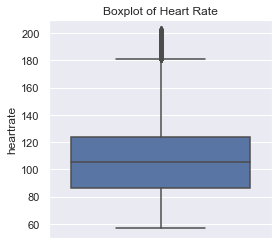

In [24]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Boxplot of Heart Rate")
ax = sns.boxplot(y=df_train["heartrate"])

From looking at the boxplot, it is observed that the outliers have a heart rate range within 180 and 202. The highest quartile group (75%) starts from 124 and finishes at 180. The third quartile group starts from 105 and finishes at 124. The second quartile group starts at 86 and finishe at 124. While the first quartile group starts at 57 which is the lowest data point and finishes at 86-the inter quartile range. 

In the following cells, i will be analyzing different activities/attributes in the dataframe

<AxesSubplot:title={'center':'Heart rate average for different activities'}, xlabel='activity_id'>

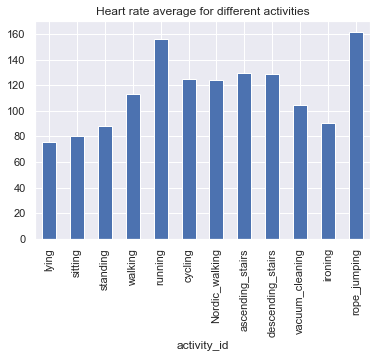

In [25]:
df_hr_act = df_train['heartrate'].groupby(df_train['activity_id']).mean()
df_hr_act.index = df_hr_act.index.map(activity_id)
plt.title('Heart rate average for different activities')
df_hr_act.plot(kind='bar')

From the above bar chart it is evident that rope jumping and running are the most tedious activities as they have a heart rate higher than every other activity. However the slightly physically challenging activities like cycling, Nordic Walking, ascending and descending stairs have an average heart rate higher than the less tedious activities. While the physically easy activities like sitting, lying, standing and ironing have lower heart rates.
Among all the activities, rope jumping has the highest heart rate of about 160 while lying has the least heart rate of about 75.

I move on to see the "hand temperature" data description for different activities

In [26]:
#To see how the temperature data description of the hand for different activitites
df_tmp_hand = df_train[['handTemperature']].groupby(df_train['activity_id'])
k = df_tmp_hand.describe()
k.index = df_tmp_hand.describe().index.map(activity_id)# To change the index to the real index
k

handTemperature                                         \
                            count       mean       std      min      25%   
activity_id                                                                
lying                     14101.0  32.732067  1.404955  30.1875  31.3125   
sitting                   13503.0  33.266162  1.103005  31.5000  32.1875   
standing                  13927.0  33.638916  0.855892  32.1875  33.0000   
walking                   17403.0  32.294685  1.378107  28.6875  31.3125   
running                    7131.0  30.815160  2.095377  27.9375  28.8125   
cycling                   12027.0  31.007691  1.994362  27.5625  29.3125   
Nordic_walking            13818.0  31.527517  1.752760  28.9375  30.3125   
ascending_stairs           8601.0  33.527744  0.873469  31.7500  32.5625   
descending_stairs          7585.0  33.322322  0.882146  31.5625  32.4375   
vacuum_cleaning           12869.0  34.177418  0.651571  33.0625  33.6875   
ironing                   17335.0  34.017351  0.772009  32.6250  33.4375   
rope_jumping               3626.0  29.733384  2.497353  24.8750  28.4375   

                                              
                       50%      75%      max  
activity_id                                   
lying              32.8750  33.8125  34.9375  
sitting            33.5000  34.2500  35.0625  
standing           33.5625  34.2500  35.2500  
walking            32.5625  33.0625  34.8750  
running            30.8125  33.8125  33.8750  
cycling            31.0625  32.7500  34.6875  
Nordic_walking     30.7500  33.0000  34.9375  
ascending_stairs   33.7500  34.1250  35.1250  
descending_stairs  33.5625  33.8750  34.8750  
vacuum_cleaning    34.1250  34.6250  35.5000  
ironing            33.9375  34.6875  35.5000  
rope_jumping       30.1875  30.8125  33.8750

From the above cell, it is observed that  "vacuum_cleaning" has the highest temperature mean followed by "ironing" which could be as a result of the emission of hot air from the machines. Activities like "rope jumping" and "running" have the lowest temperature mean.

I move on to further plot boxplots for temperature variations for the different activities

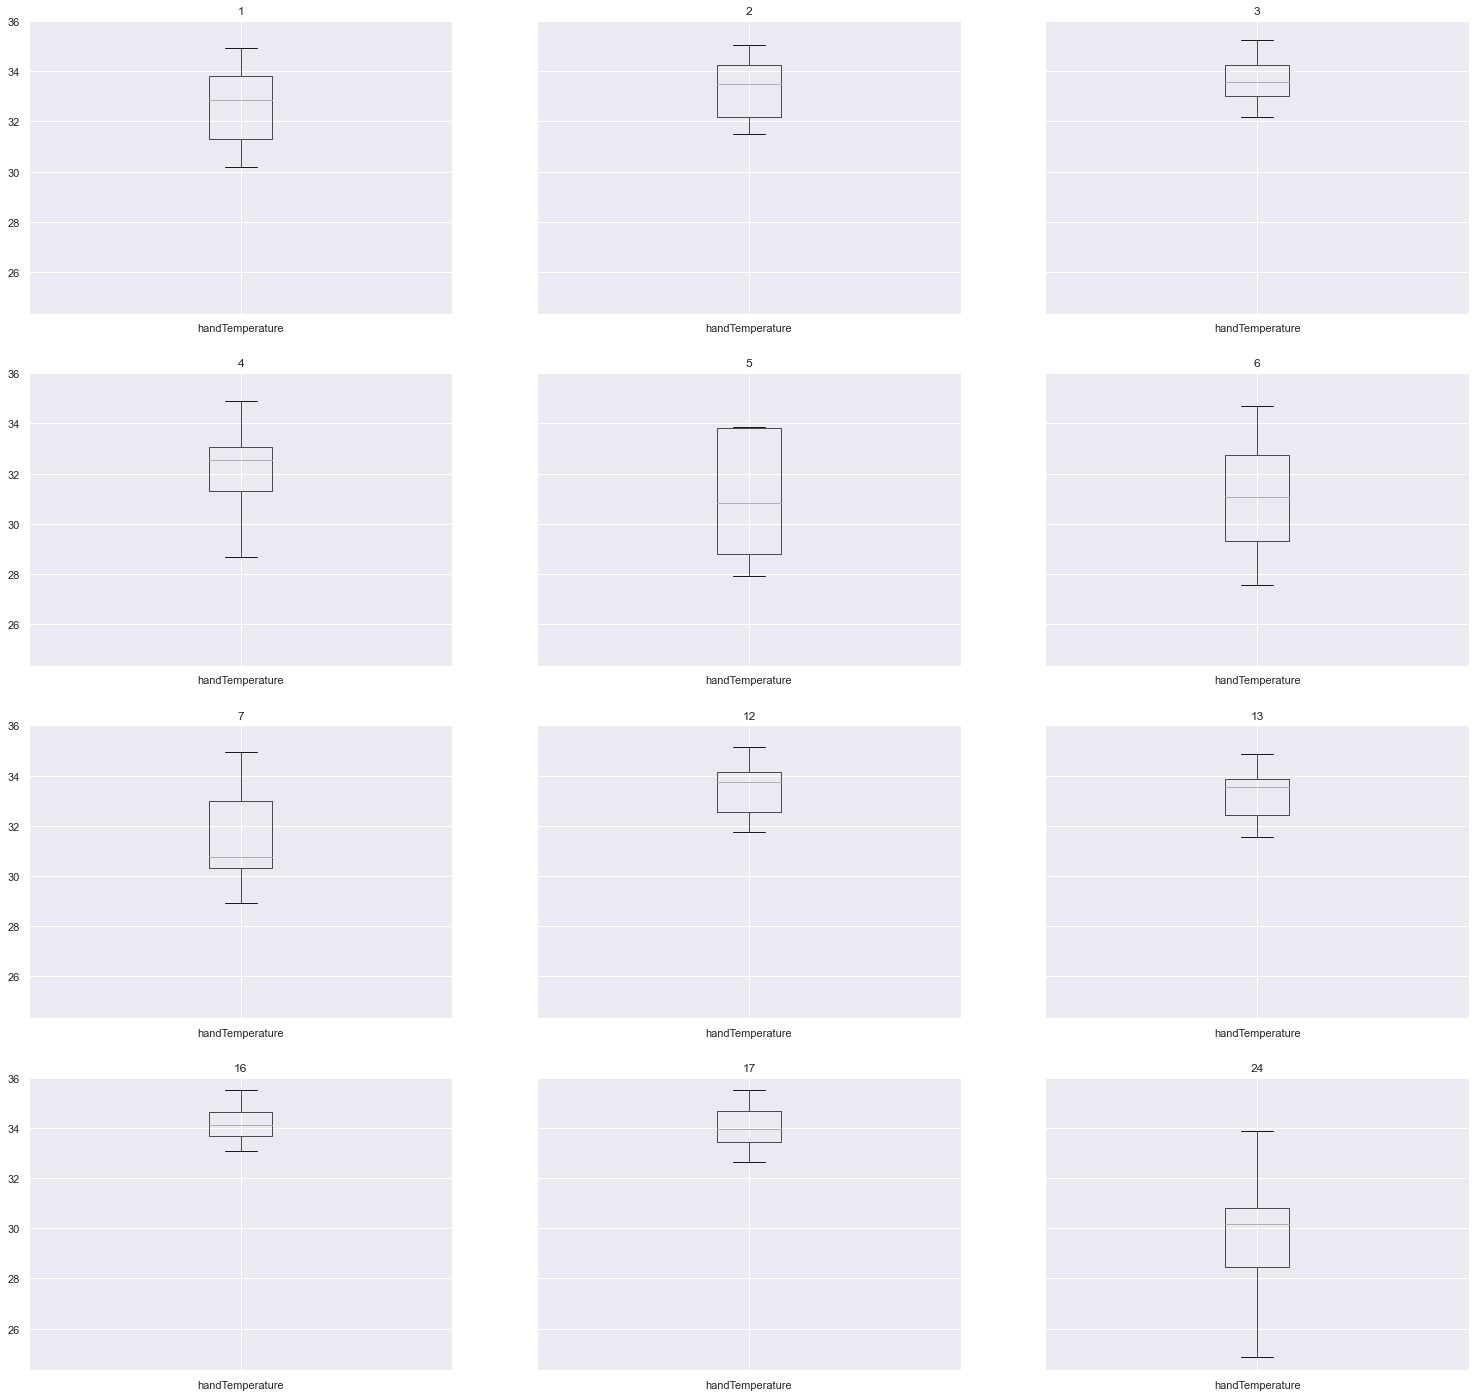

In [27]:
#Box plot for temperature variation for different activities
df_tmp_hand.boxplot(figsize = (25,25))
plt.show()

From the boxplot above, it is observed that "rope jumping"(24) has the maximum temperature variance while "vacuum cleaning"(16) has the least temperature variance. 

For further exploratory data analysis, i move on to finding the correlation between variables in the dataframe using the "spearman correlation method".

In [28]:
#removing unsuitable columns for correlation
df_train1 = df_train.drop(['SubjectID','activity_id','timestamp'],axis =1)

In [29]:
df_train1.corr(method = 'spearman').style.background_gradient()

,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3
heartrate,1.000000,-0.346925,-0.332908,0.017736,-0.283034,-0.006982,0.029049,0.003364,-0.040121,-0.043398,0.052684,-0.410743,-0.019035,0.032508,-0.032227,-0.056197,0.320740,0.266147,0.042111,-0.035970,0.033539,-0.090423
handTemperature,-0.346925,1.000000,0.056358,-0.004137,0.009933,-0.016461,-0.008307,-0.002010,0.743749,0.015175,0.065422,0.023660,0.006505,-0.009635,0.017979,0.503030,-0.069841,-0.038192,-0.092984,0.018988,-0.006912,0.049524
handAcc16_1,-0.332908,0.056358,1.000000,0.080315,0.335664,0.047953,-0.056976,0.005026,-0.162817,0.014801,-0.331452,0.333718,-0.021655,-0.038410,0.047271,-0.121514,-0.323069,-0.154564,-0.011891,0.059893,-0.045442,0.142910
handAcc16_2,0.017736,-0.004137,0.080315,1.000000,-0.044612,0.092580,0.001304,-0.019967,-0.064645,0.016522,0.180100,-0.129315,0.003081,0.005062,0.056927,0.089441,0.095335,0.052232,0.045581,0.012596,-0.053136,-0.011981
handAcc16_3,-0.283034,0.009933,0.335664,-0.044612,1.000000,0.001794,0.024598,-0.062115,-0.131251,-0.105142,-0.100394,0.075126,-0.011729,-0.021102,0.043441,-0.064480,-0.204193,-0.074964,0.045915,0.067054,-0.045747,0.086750
handGyro1,-0.006982,-0.016461,0.047953,0.092580,0.001794,1.000000,-0.186541,-0.246130,-0.025513,-0.068289,-0.009011,0.016285,0.001725,-0.202349,0.205414,-0.012435,-0.010159,-0.018526,-0.012911,0.067727,-0.035830,0.151139
handGyro2,0.029049,-0.008307,-0.056976,0.001304,0.024598,-0.186541,1.000000,-0.000627,-0.011207,0.005123,0.013892,-0.019199,0.046784,0.167542,-0.071787,-0.008996,0.008104,-0.012440,-0.004635,0.054467,0.033569,0.018544
handGyro3,0.003364,-0.002010,0.005026,-0.019967,-0.062115,-0.246130,-0.000627,1.000000,-0.000316,0.150387,-0.052082,-0.002590,-0.063998,0.270733,-0.162489,-0.005687,-0.023779,0.077197,0.037775,-0.068590,-0.008884,-0.184038
chestTemperature,-0.040121,0.743749,-0.162817,-0.064645,-0.131251,-0.025513,-0.011207,-0.000316,1.000000,0.040900,0.142334,-0.093399,0.023150,0.015968,0.002514,0.451462,0.110973,0.074031,-0.127665,-0.017513,-0.005377,-0.035981
chestAcc16_1,-0.043398,0.015175,0.014801,0.016522,-0.105142,-0.068289,0.005123,0.150387,0.040900,1.000000,0.068646,0.138751,0.016752,0.085367,0.006635,-0.025569,-0.077700,0.044348,-0.135570,0.011112,-0.021075,-0.038957


From the above cell, it is observed that the gyroscopes do not correlate with any other data and seems not useful.

Observed also is the negative correlation between the temperatures and heartrate while all the temperature  measurements are positively correlated with each other.

Also, ankle accelerometer for all 3 instances seem to have the most positive correlation with heartrate compared to others.

Now we move further to hypothesis testing

# Hypothesis Testing

From the Exploratory data analysis done, it is observed that the ankle accelerometer for all 3 instances seem to have the most positive correlation with heartrate compared to others. Hence i will be testing the hypothesis that "An increase in the acceleration of the ankle is directly proportional to an increase in heartrate". 

Null Hypothesis:
An increase in the acceleration of the ankle is not directly proportional to an increase in heartrate".
 
Alternate Hypothesis:
 An increase in the acceleration of the ankle is directly proportional to an increase in heartrate".

In [30]:
#Hypothesis test function
def hypothesis_test(data1,data2):
  correlation,p_value = spearmanr(data1,data2)
  print('correlation between the parameters = {}'.format(correlation))
  print('p_value = {}'.format(p_value))
  for i in [0.01 , 0.05, 0.1]:
      if p_value < i:
        print('The null Hypothesis is rejected')
        break

      else:
        print('Failed to reject the null Hypothesis')


For the sake of the hypothesis test, i will be using just one instance of the ankle acceleration "ankleAcc16_1" which is more positively correlated to the heartrate than the other instances

In [31]:
hypothesis_test(df_test['ankleAcc16_1'],df_test['heartrate'])


correlation between the parameters = 0.320075504219535
p_value = 0.0
The null Hypothesis is rejected


Obtaining a p-value less than 0.05 indicates strong evidence against the null hypothesis, as there is a less than 5% chance that it is true. So we reject the null hypothesis that states that "An increase in the acceleration of the ankle is not directly proportional to an increase in heartrate" and retain the alternate hypothesis that states that "An increase in the acceleration of the ankle is directly proportional to an increase in heartrate."

# Modelling

After testing my hypothesis, i move on to modelling and if we recall, the goal of this report is to develop a hardware/software that can determine the amount/type of physical activity performed by an individual. 

To be able to predict the activity performed by an individual, developing and testing some models to carry out the operation is imperative.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [33]:
df_train = df_train.drop(['SubjectID','timestamp'],axis =1)

In [34]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = df_train.copy()
df_scaled_test = df_test.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activity_id,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handGyro1,handGyro2,handGyro3,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestGyro1,chestGyro2,chestGyro3,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleGyro1,ankleGyro2,ankleGyro3
68817,3,-0.184211,-0.052632,1.085261,1.066579,-0.523858,-0.047601,-0.085100,-0.010972,-0.805556,-0.091187,0.109579,0.043691,-0.037400,-0.063660,0.078820,-0.458333,-0.006804,-0.521004,0.628625,0.088991,-0.018338,0.000325
2773370,7,0.315789,-1.026316,0.765732,-1.179732,-0.193581,0.458850,-0.919064,-0.677999,-1.166667,0.211907,-1.149082,0.424650,0.228242,1.389731,-0.856325,-1.500000,-0.456189,-0.341926,-0.168983,2.302984,1.166591,1.439370
2622702,12,-0.184211,0.526316,-1.269145,-0.825163,-0.863913,-2.311741,-1.300942,4.230195,0.722222,1.998836,1.158222,-0.305377,1.886994,6.072773,0.122494,0.166667,-1.813878,-1.329696,-0.016686,13.266368,-5.752061,2.609494
331735,5,1.789474,-1.157895,-0.634796,-0.017446,-0.759301,1.327298,7.543413,4.685347,-1.222222,-2.427590,-0.395453,-0.631303,-0.356366,11.058860,-4.546408,-0.708333,7.331588,-0.481928,0.067232,-4.914830,6.109190,-0.293518
1747730,5,1.473684,0.289474,2.041316,-0.688296,-0.876520,-1.092559,0.127076,0.698341,0.000000,-0.209801,-2.323163,0.196357,2.263468,-0.486652,2.386954,0.000000,-2.000269,3.887760,1.243552,1.086421,-4.541725,-5.145980


In [35]:
X_train = df_scaled.drop('activity_id', axis=1).values
y_train = df_scaled['activity_id'].values

# Test Dataset
X_test = df_scaled.drop('activity_id', axis=1).values
y_test = df_scaled['activity_id'].values

In [36]:
def get_metrics (y_true,y_pred):# function to get accuracy,precision,Recall and F1 score of the data
    acc = accuracy_score(y_true, y_pred)
    p = precision_score(y_true, y_pred,average=None).mean()#average precision 
    r = recall_score(y_true, y_pred, average=None).mean()#average recall
    f1 = f1_score(y_true, y_pred, average=None).mean()#average f1 score
   
    print("Accuracy:",acc)
    print("Precision:", p)
    print("Recall:", r)
    print("F1:", f1)


# Dimensionality reduction using Principal Component Analysis(PCA)

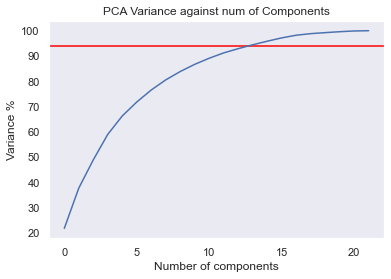

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Components")
plt.ylabel("Variance %")
plt.xlabel("Number of components")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

We can observe from the graph above plotting the variance ratio against the number of components that both lines intersect at x = 13, which indicates that for our data, 13 features are required to capture 94% of the variation.

In [38]:
pca = PCA(n_components=13)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)


In [39]:
X_train_df = pd.DataFrame(X_train,columns=['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10','PCA_11','PCA_12','PCA_13'])#the columns show the 13 columns created by the PCA object
X_train_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,0.048179,-0.013182,-0.075063,-0.029107,0.206312,-0.236477,0.319640,-0.468828,0.256048,0.266809,-0.702058,-0.601579,-0.110054
1,-2.361642,-0.423118,0.720398,1.658753,0.667414,-0.344554,0.436879,-1.100771,-0.033011,-1.824703,0.423920,1.222497,-0.476559
2,-8.191242,1.058814,13.204969,0.377203,-2.930123,0.530401,1.109078,-4.592078,-0.662415,-1.516979,-0.463533,-2.681435,-1.155894
3,5.395772,6.698376,-2.895275,10.272973,-8.422572,2.004811,1.879913,0.059970,7.449420,-4.030113,-0.184370,1.978862,-0.286323
4,2.853552,-1.216991,5.276446,-3.803120,0.320415,1.457067,-2.566704,1.770350,-1.749520,1.314907,-1.350296,2.867106,-2.586873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141921,-0.005890,0.247404,1.152142,1.275659,-2.044003,1.887403,-0.201962,-1.296781,2.837185,2.113384,0.562604,0.286946,-0.301526
141922,-15.563172,-1.048566,-6.054545,2.199785,4.431146,-1.967364,-1.143897,0.097224,-1.339551,5.531662,-0.343045,-3.134785,1.666975
141923,0.374691,-0.065378,-0.038743,0.467259,-1.323707,-0.415102,-0.159716,-0.775370,-1.321696,1.959994,-0.149998,-0.513225,0.547129
141924,-0.249302,0.044441,0.810664,2.901721,-0.006263,-0.670164,-0.418428,-1.134135,1.099045,-2.987382,0.047099,0.735282,-1.619556


# Support Vector Classifier (SVC) Model with PCA

In [40]:
from sklearn.svm import SVC

In [41]:
%%time
SVCmodel = SVC(kernel = 'rbf')
SVCmodel.fit(X_train, y_train)

CPU times: user 24min 8s, sys: 18.7 s, total: 24min 26s
Wall time: 25min 1s


SVC()

It can be seen that the SVC model takes 25 minutes to train the data using the PCA method.

In [42]:
%%time
SVCmodel_y_pred = SVCmodel.predict(X_test)
print(len(SVCmodel_y_pred))
print(len(y_test))
#compare the first 5 predictions with original classification
print(SVCmodel_y_pred[0:5])
print(y_test[0:5])

141926
141926
[ 2  7 12  5  5]
[ 3  7 12  5  5]
CPU times: user 36min 33s, sys: 8.16 s, total: 36min 42s
Wall time: 37min 16s


The SVC model takes 37 minutes to test the data using PCA method.

In [43]:
get_metrics(y_test,SVCmodel_y_pred)# to get the score

Accuracy: 0.7602905739610784
Precision: 0.8068220881457773
Recall: 0.7585967379527294
F1: 0.776839100584863


With an accuracy of 76, the SVC model using PCA gives good results but takes a long time to train/test the data.

I will move on to training and testing the data with Random Forest Classifier model.

# Random Forest Classifier

In [77]:
#Using RandomForest model for classification
from sklearn.ensemble import RandomForestClassifier

In [78]:
%%time
RFmodel = RandomForestClassifier()#creating the model object
RFmodel.fit(X_train,y_train)

CPU times: user 30 s, sys: 219 ms, total: 30.2 s
Wall time: 30.8 s


RandomForestClassifier()

The Random Forest Classifier only takes 30 seconds to train the model whereas the SVC model took 25 minutes.

In [89]:
%%time
RFmodel_y_pred = RFmodel.predict(X_test)
print(len(RFmodel_y_pred))
print(len(y_test))
print(RFmodel_y_pred[0:5])
print(y_test[0:5])

35482
35482
[ 5  1 16 17  6]
2114271     5
2166203     1
973135     16
2227352    17
1716930     6
Name: activity_id, dtype: int64
CPU times: user 879 ms, sys: 99.1 ms, total: 979 ms
Wall time: 1.06 s


The Random Forest Classifier only takes approximately 1 minute 6 seconds to test the model

In [82]:
get_metrics(y_test,RFmodel_y_pred)

Accuracy: 0.999323600698946
Precision: 0.9991527383552973
Recall: 0.9991858705889106
F1: 0.9991690375234925


With an accuracy of 99.93, the Random Forest Model from observation of the cell above gives nearly perfect scores on all counts!


# Summary & Conclusion

I have analyzed the Physical Activity Monitoring (PAMAP2) dataset and gained various insights from it. 

The first thing i did was to lay out the goal and requirements of the report afterwhich i imported necessary libraries and loaded the dataset.

After loading the dataset, i proceeded to cleaning the data(dropping irrelevant columns,null values and interpolation to cater for missing values). After cleaning, i moved on to perform some exploratory data analysis but first i randomly split the data into "train" and "test" sets to avoid overfitting before i commenced my analysis on the "train" data. From my EDA, the following observations were made:

1) the gyroscopes do not correlate with any other data and seems not useful.

2) there is a negative correlation between the temperatures and heartrate while all the temperature  measurements are positively correlated with each other.

3) ankle accelerometer for all 3 instances seem to have the most positive correlation with heartrate compared to others.

And the third observation led to me testing the  hypothesis that "An increase in the acceleration of the ankle is directly proportional to an increase in heartrate". After testing my hypothesis, i moved on to modeling and from training and testing the data with 2 models: Support Vector Machine Model(with Principal Component Analysis) and the Random Forest mclassifier, the RFC has a very high accuracy and it also takes low time to calculate accuracy compared to the SVM.

In conclusion, it is my suggestion that the Random Forest Classifier should be used in developing the hardware and/or software for determining the type of physical activity carried out by an individual. 


# References

Donges, N. (2018). The Random Forest Algorithm – Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

Kyratzis A. (2019). PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML.
Available at: https://github.com/andreasKyratzis/PAMAP2-Physical-Activity-Monitoring-Data-Analysis-and-ML